In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data
data = pd.read_csv(r"C:\Users\Arnab Pan\Desktop\CE_Radiation_India\Solar_Radiation_CE.csv")
data.head()

YEAR    LAT    LON  ALLSKY_SFC_SW_DWN    T2M   QV2M   RH2M     PS  WS10
0  1984  19.75  78.75               5.31  27.55  10.86  49.88  97.27  3.55
1  1984  19.75  79.25               5.21  27.72  11.23  51.25  97.79  3.39
2  1984  19.75  79.75               5.21  27.61  11.60  53.21  98.05  3.06
3  1984  19.75  80.25               5.09  26.95  11.85  55.86  97.50  2.71
4  1984  19.75  80.75               5.09  25.84  11.98  58.88  96.18  2.62

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               10920 non-null  int64  
 1   LAT                10920 non-null  float64
 2   LON                10920 non-null  float64
 3   ALLSKY_SFC_SW_DWN  10920 non-null  float64
 4   T2M                10920 non-null  float64
 5   QV2M               10920 non-null  float64
 6   RH2M               10920 non-null  float64
 7   PS                 10920 non-null  float64
 8   WS10               10920 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 767.9 KB


In [4]:
data.isnull().sum()

YEAR                 0
LAT                  0
LON                  0
ALLSKY_SFC_SW_DWN    0
T2M                  0
QV2M                 0
RH2M                 0
PS                   0
WS10                 0
dtype: int64

In [5]:
data.nunique()

YEAR                   39
LAT                    14
LON                    20
ALLSKY_SFC_SW_DWN     137
T2M                   503
QV2M                  946
RH2M                 3293
PS                    772
WS10                  343
dtype: int64

In [6]:
data.dtypes

YEAR                   int64
LAT                  float64
LON                  float64
ALLSKY_SFC_SW_DWN    float64
T2M                  float64
QV2M                 float64
RH2M                 float64
PS                   float64
WS10                 float64
dtype: object

In [7]:
data.corr()

YEAR           LAT           LON  \
YEAR               1.000000e+00  9.242759e-15 -9.279763e-14   
LAT                9.242759e-15  1.000000e+00 -1.969764e-15   
LON               -9.279763e-14 -1.969764e-15  1.000000e+00   
ALLSKY_SFC_SW_DWN -3.722509e-01 -1.073674e-01 -6.402076e-01   
T2M               -1.088486e-01 -9.378476e-02  1.881043e-02   
QV2M               2.179353e-01 -5.365234e-01  6.782383e-01   
RH2M               2.640101e-01 -5.727846e-01  6.467650e-01   
PS                 1.058994e-02  2.129944e-01  5.772937e-01   
WS10              -1.601775e-01 -3.412305e-01  2.258300e-01   

                   ALLSKY_SFC_SW_DWN       T2M      QV2M      RH2M        PS  \
YEAR                       -0.372251 -0.108849  0.217935  0.264010  0.010590   
LAT                        -0.107367 -0.093785 -0.536523 -0.572785  0.212994   
LON                        -0.640208  0.018810  0.678238  0.646765  0.577294   
ALLSKY_SFC_SW_DWN           1.000000  0.099817 -0.562225 -0.578608 -0.453256   
T2M                         0.099817  1.000000  0.213981 -0.059171  0.664339   
QV2M                       -0.562225  0.213981  1.000000  0.952323  0.507276   
RH2M                       -0.578608 -0.059171  0.952323  1.000000  0.305812   
PS                         -0.453256  0.664339  0.507276  0.305812  1.000000   
WS10                       -0.057131  0.412094  0.553993  0.391996  0.344262   

                       WS10  
YEAR              -0.160177  
LAT               -0.341231  
LON                0.225830  
ALLSKY_SFC_SW_DWN -0.057131  
T2M                0.412094  
QV2M               0.553993  
RH2M               0.391996  
PS                 0.344262  
WS10               1.000000

In [8]:
# Step 2: Preprocess data
# Select relevant columns (features and target)

features = ['YEAR', 'LAT', 'LON', 'T2M', 'QV2M', 'RH2M', 'PS', 'WS10']
target = 'ALLSKY_SFC_SW_DWN'

X = data[features]
y = data[target]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

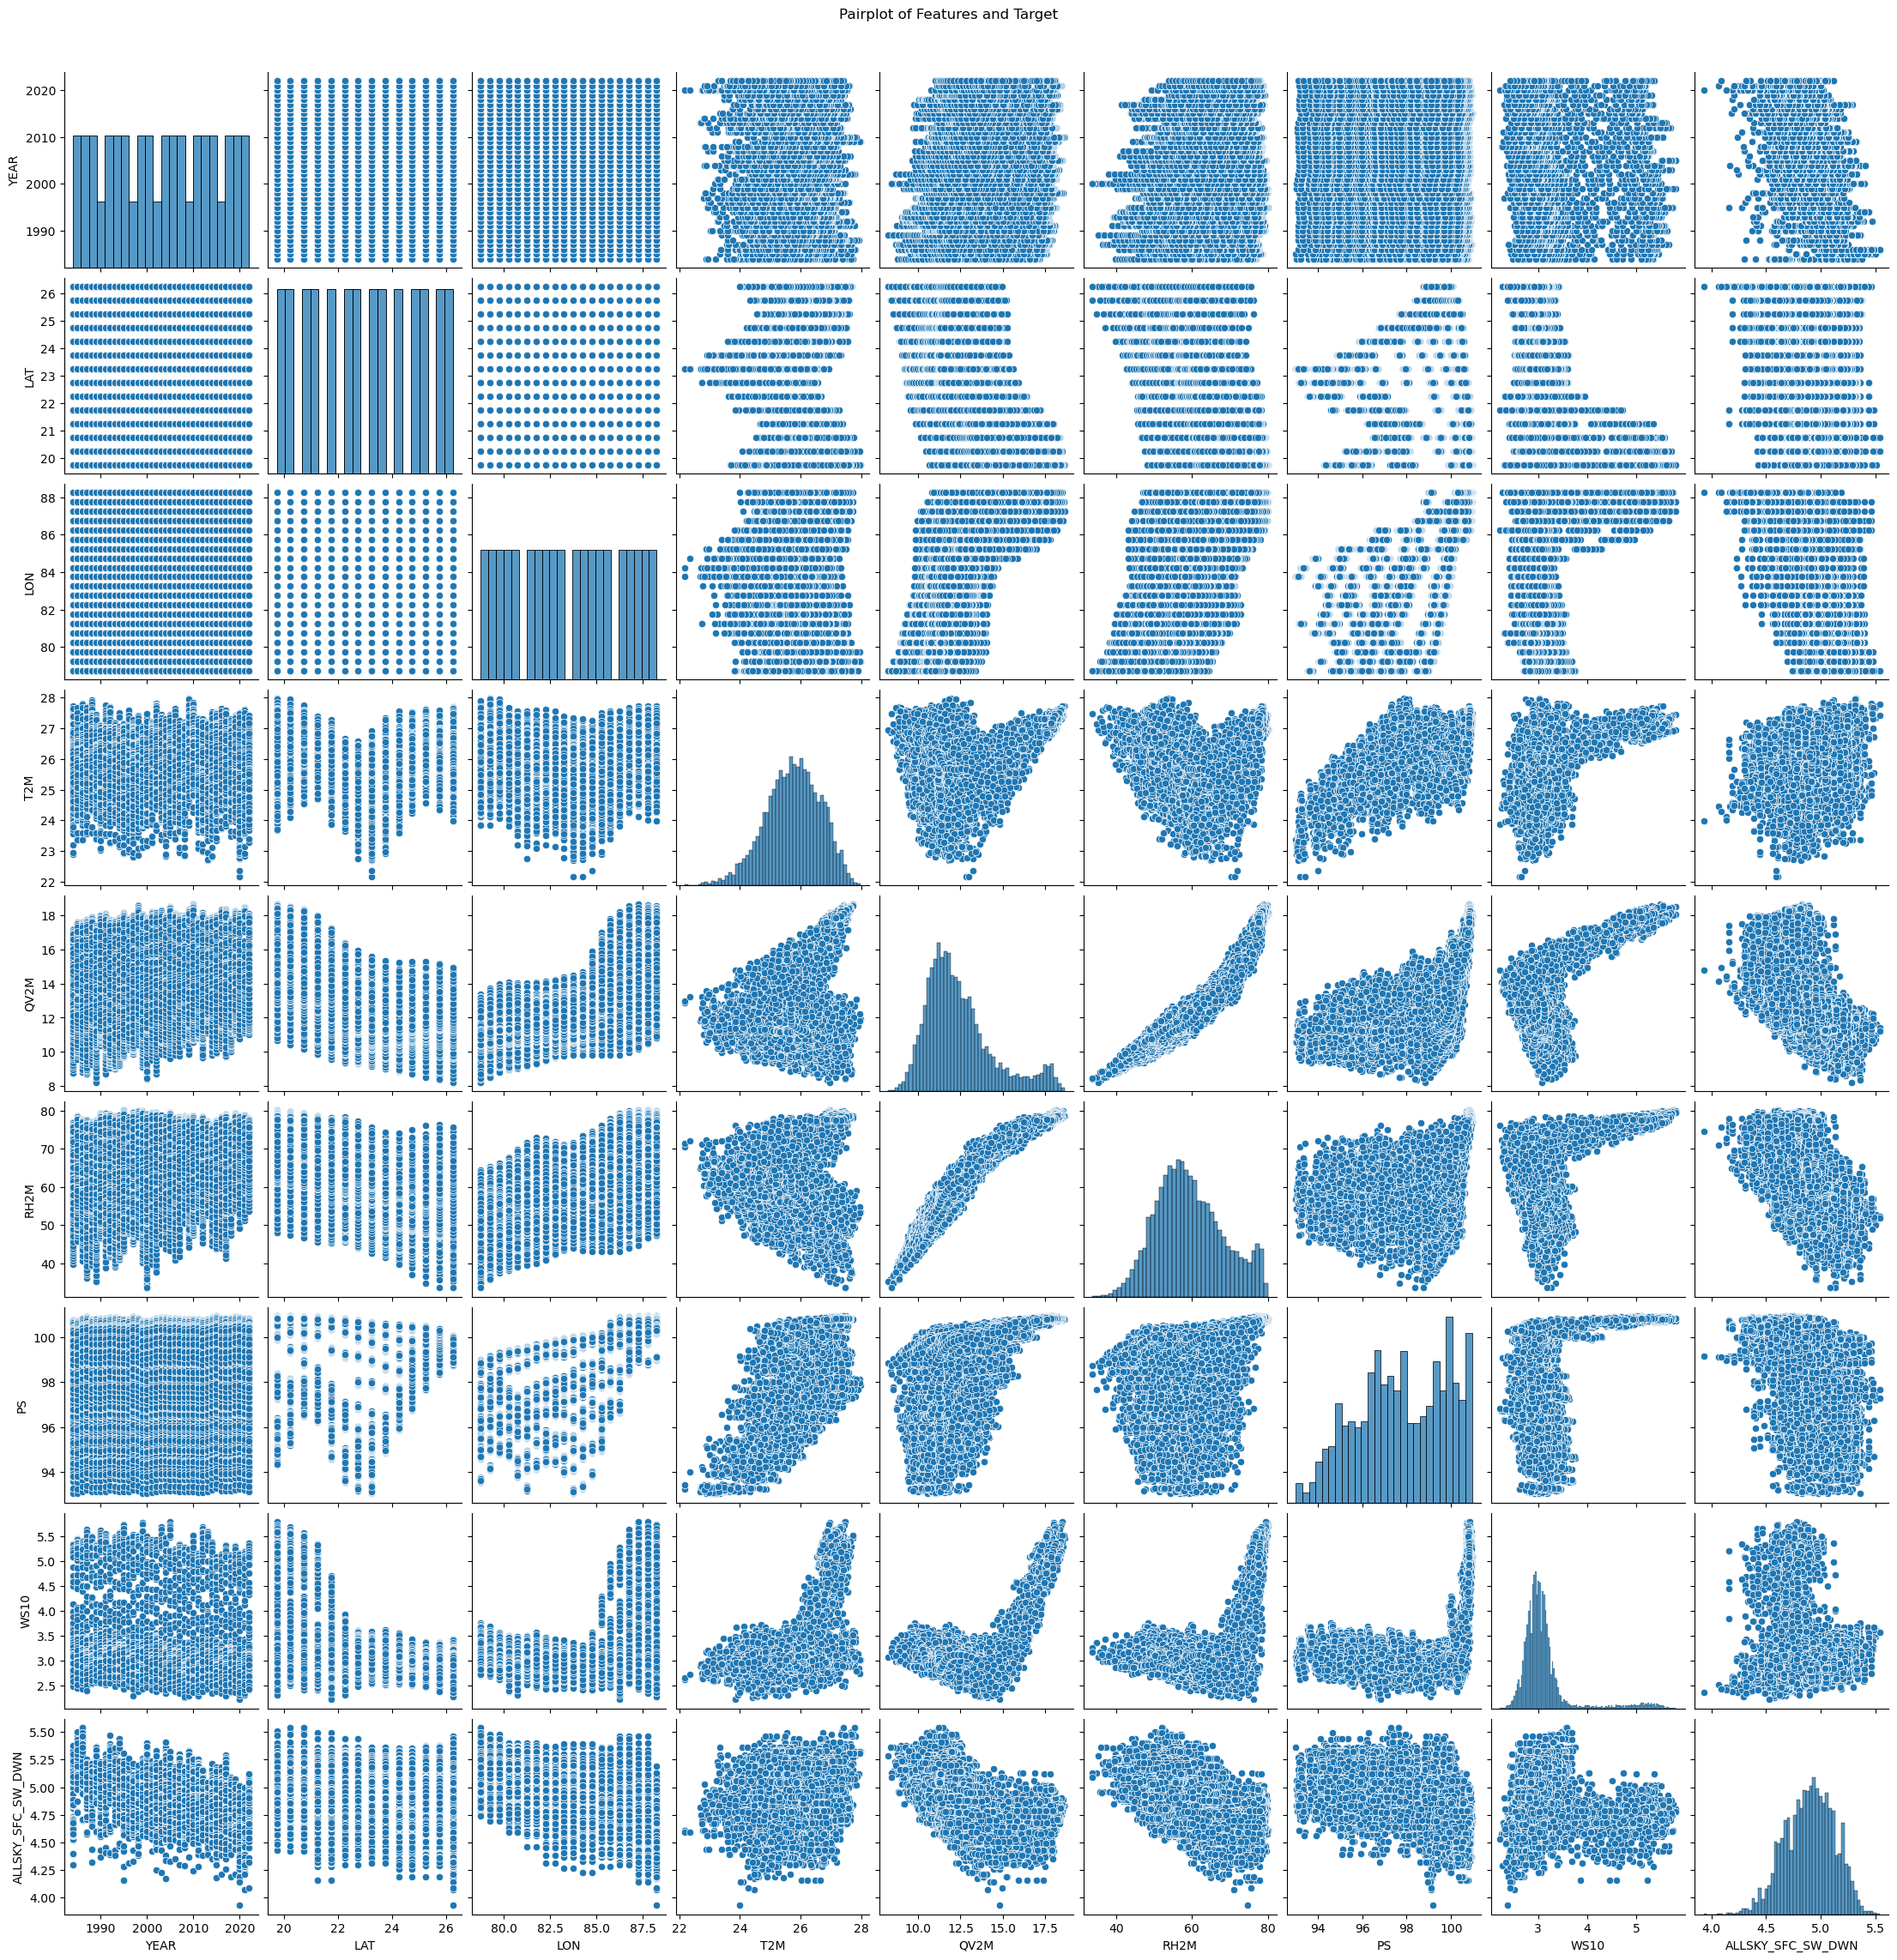

In [9]:
# Step 3: Data analysis using various graphs

# Pairplot to visualize relationships between features and target

sns.pairplot(data[features + [target]])
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

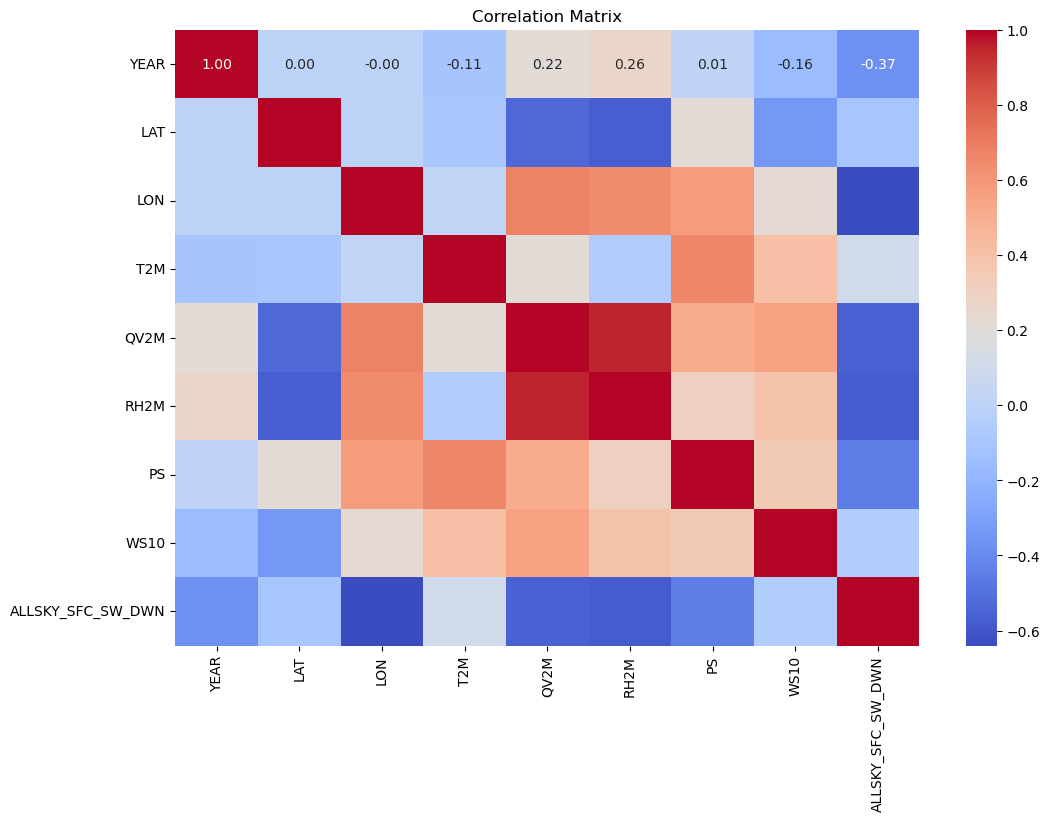

In [10]:
# Correlation matrix

corr_matrix = data[features + [target]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


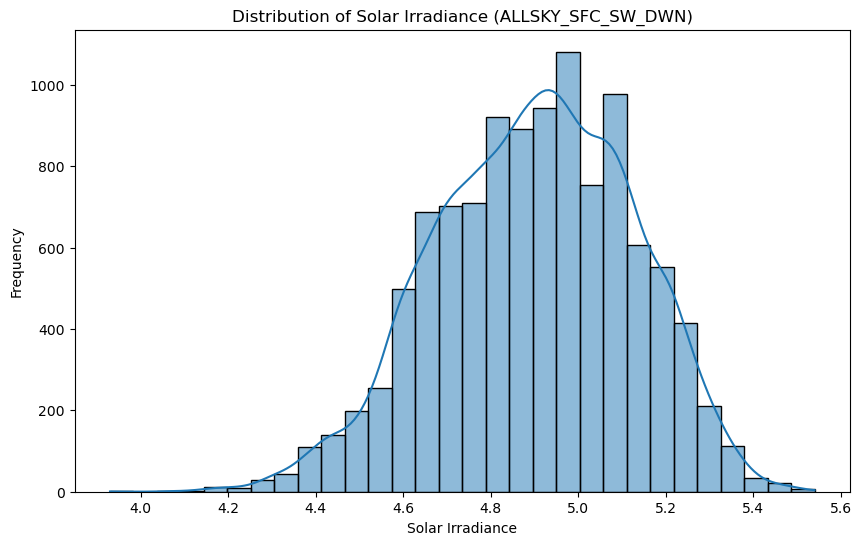

In [11]:
# Distribution of the target variable

plt.figure(figsize=(10, 6))
sns.histplot(data[target], bins=30, kde=True)
plt.title("Distribution of Solar Irradiance (ALLSKY_SFC_SW_DWN)")
plt.xlabel("Solar Irradiance")
plt.ylabel("Frequency")
plt.show()

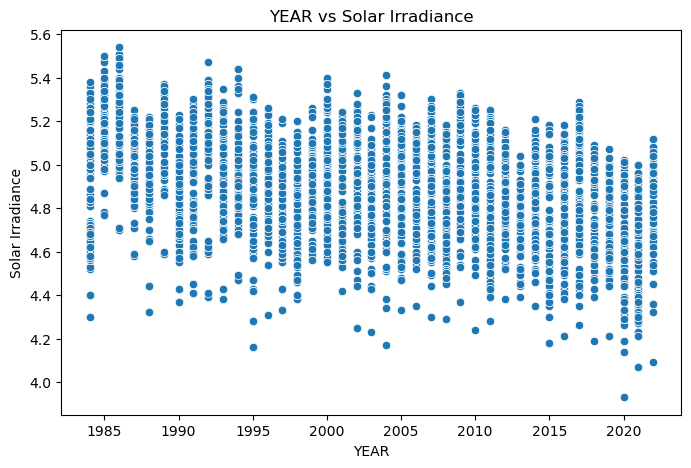

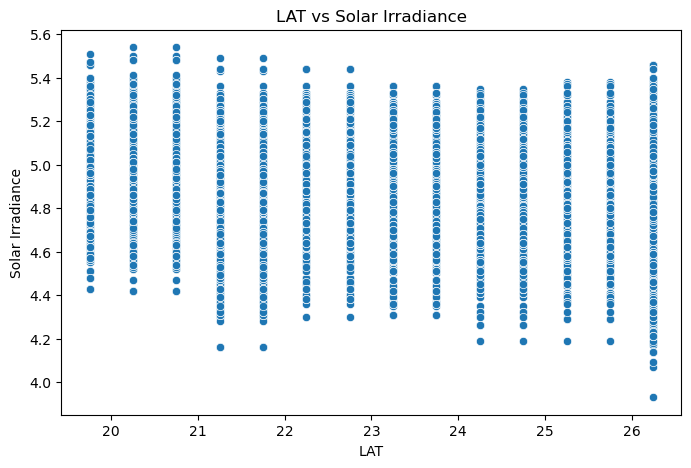

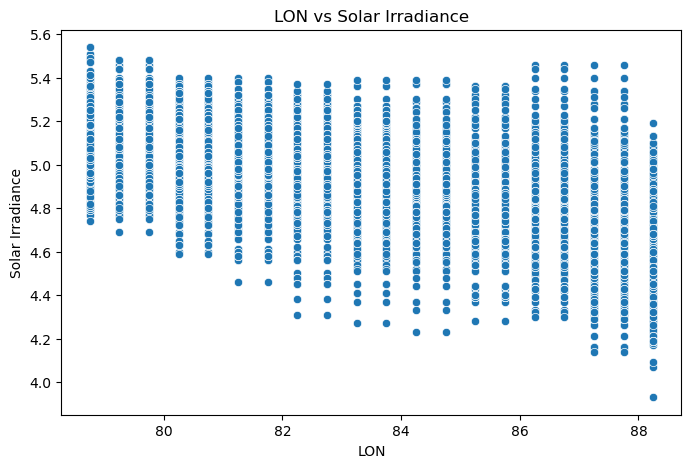

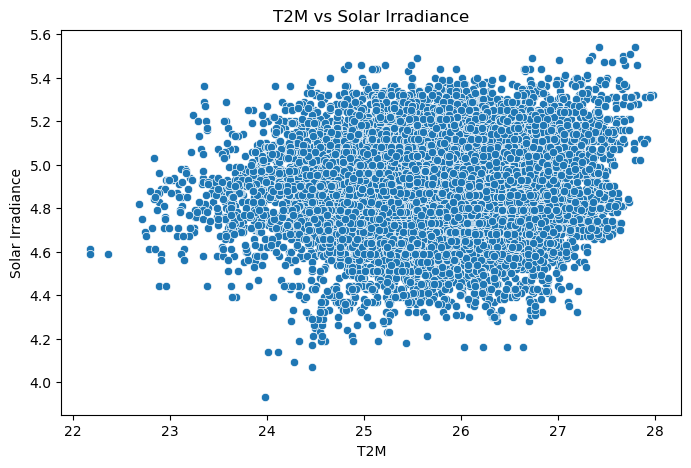

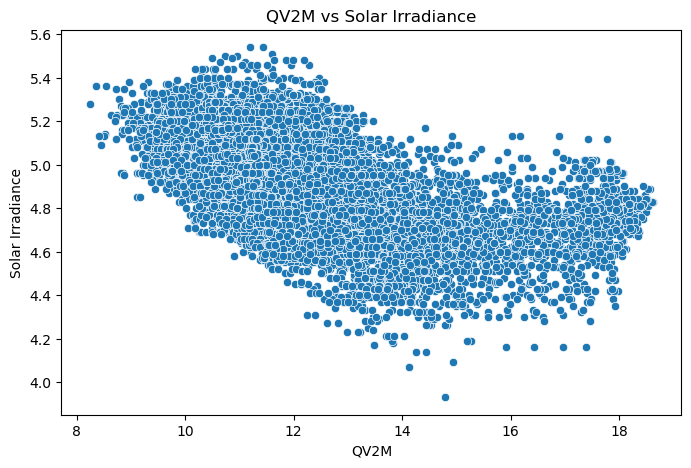

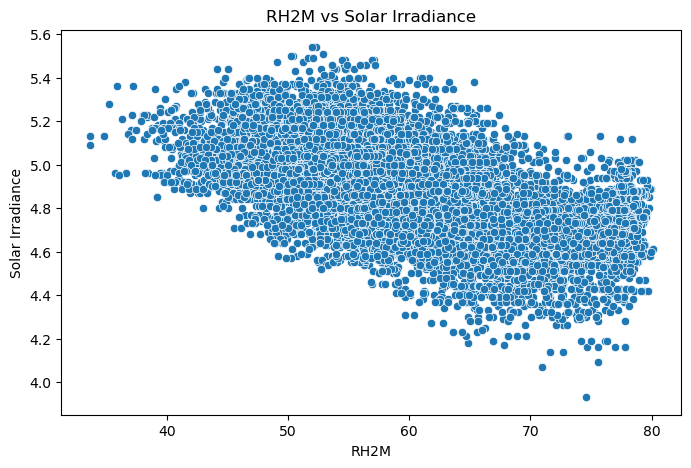

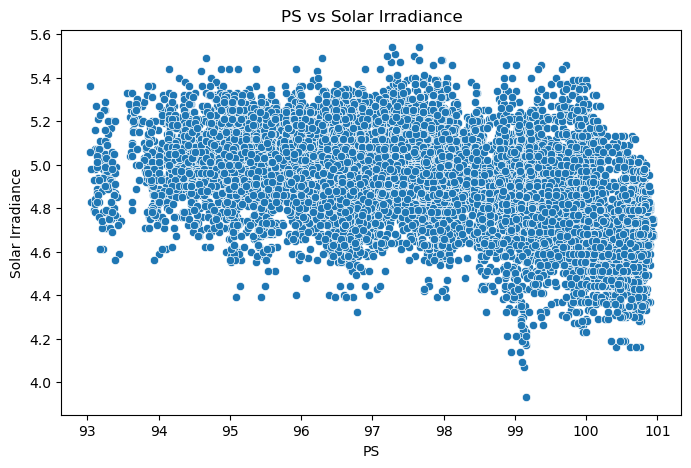

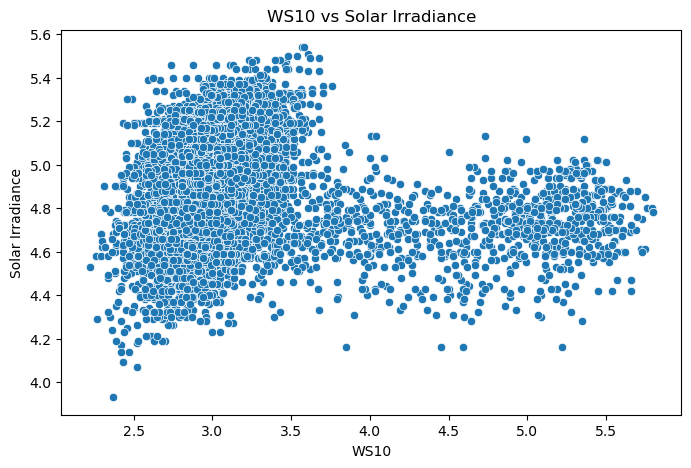

In [12]:
# Scatter plots for each feature vs. the target variable

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=y)
    plt.title(f"{feature} vs Solar Irradiance")
    plt.xlabel(feature)
    plt.ylabel("Solar Irradiance")
    plt.show()

In [13]:
# Step 4: Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Step 5: Standardize the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 6: Train models
# Define a dictionary with model names as keys and model instances as values

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

In [16]:
# Initialize a dictionary to store the results

results = {}

In [17]:
# Iterate over the models dictionary

for name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    # Predict on the test data
    y_pred = model.predict(X_test_scaled)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared (R2) score
    r2 = r2_score(y_test, y_pred)
    # Store the results in the dictionary
    results[name] = {'MSE': mse, 'R2': r2}
    # Print the model's performance
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")


Linear Regression - MSE: 0.0173, R2: 0.6450
Random Forest Regressor - MSE: 0.0025, R2: 0.9494
Support Vector Regressor - MSE: 0.0096, R2: 0.8026
Gradient Boosting Regressor - MSE: 0.0071, R2: 0.8551
K-Nearest Neighbors Regressor - MSE: 0.0077, R2: 0.8419
XGBoost Regressor - MSE: 0.0021, R2: 0.9576


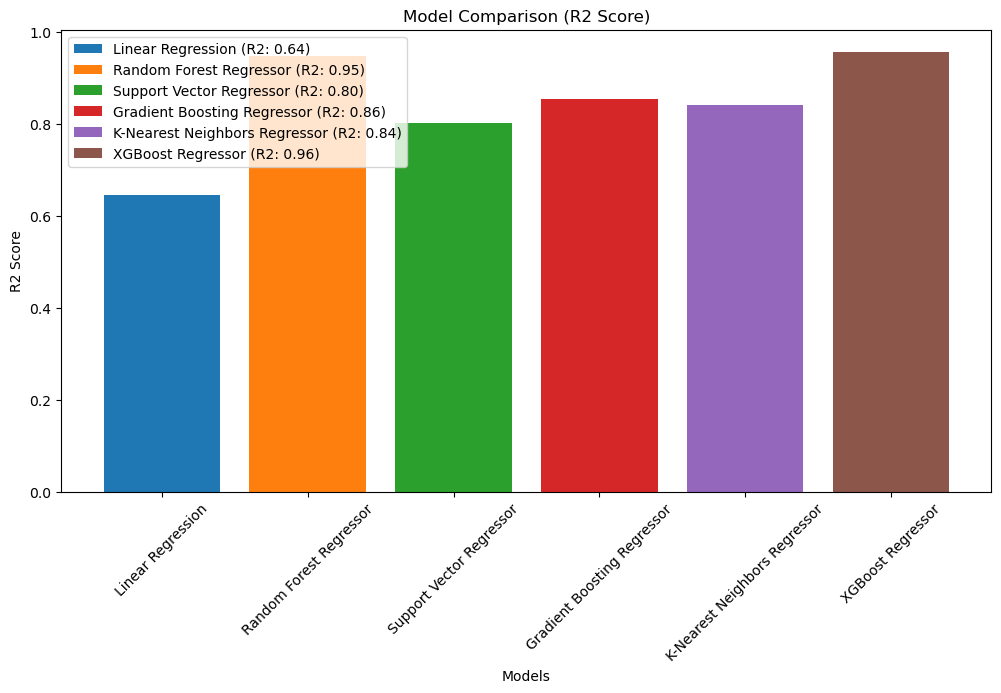

In [18]:
# Plotting results

plt.figure(figsize=(12, 6))
for name, result in results.items():
    plt.bar(name, result['R2'], label=f"{name} (R2: {result['R2']:.2f})")
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Model Comparison (R2 Score)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [19]:
# Step 7: Predict for a specific year and location using the best model (highest R2 score)

best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]

specific_location = [[2015, 37.7749, -122.4194, 15.0, 10.0, 50.0, 1013.0, 5.0]]  # Example input
specific_location_scaled = scaler.transform(specific_location)

solar_power_prediction = best_model.predict(specific_location_scaled)
print(f"Predicted Solar Power Generation using {best_model_name}: {solar_power_prediction[0]:.4f}")

Predicted Solar Power Generation using XGBoost Regressor: 4.9358


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


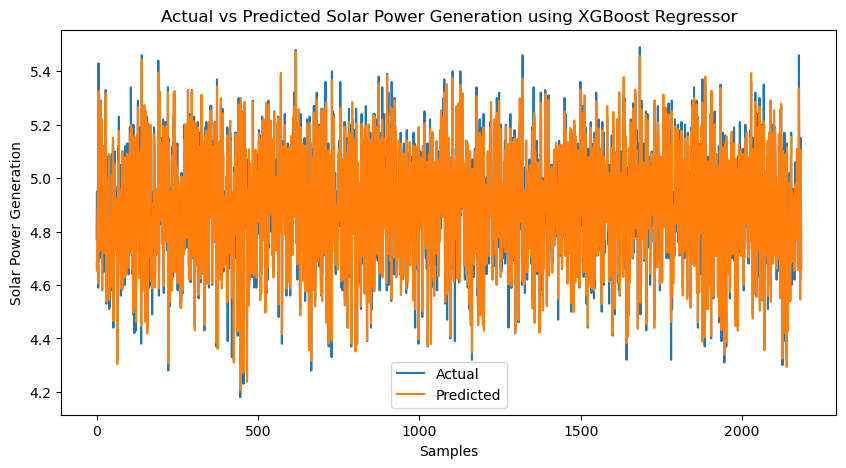

In [20]:
# Plotting Actual vs Predicted using the best model

y_pred_best = best_model.predict(X_test_scaled)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_best, label='Predicted')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Solar Power Generation')
plt.title(f'Actual vs Predicted Solar Power Generation using {best_model_name}')
plt.show()

In [21]:
from ipyleaflet import Map, Marker
from ipywidgets import VBox, HBox, Output

# Define the latitude and longitude range
lat_range = (19.75, 26.25)
lon_range = (78.75, 88.25)

# Calculate the center of the defined range
center_lat = (lat_range[0] + lat_range[1]) / 2
center_lon = (lon_range[0] + lon_range[1]) / 2
center = (center_lat, center_lon)

# Create a base map with the calculated center
m = Map(center=center, zoom=6)

# Create Output widgets to display the latitude and longitude
lat_out = Output()
lon_out = Output()

# Initialize an empty list to store the coordinates
coordinates_list = []

# Initialize lat and lon variables
lat = None
lon = None

# Function to handle click events
def handle_interaction(**kwargs):
    global lat, lon
    if kwargs.get('type') == 'click':
        lat, lon = kwargs.get('coordinates')
        with lat_out:
            lat_out.clear_output()
            print(lat)
        with lon_out:
            lon_out.clear_output()
            print(lon)
        marker = Marker(location=(lat, lon))
        m.add_layer(marker)
        coordinates_list.append((lat, lon))

# Add a click event handler to the map
m.on_interaction(handle_interaction)

# Display the map and the Output widgets in the notebook
display(VBox([m, HBox([lat_out, lon_out])]))


In [22]:
specific_location = [[2015, lat, lon, 15.0, 10.0, 50.0, 1013.0, 5.0]]  # Example input
specific_location_scaled = scaler.transform(specific_location)

solar_power_prediction = best_model.predict(specific_location_scaled)
print(f"Predicted Solar Power Generation using {best_model_name}: {solar_power_prediction[0]:.4f}")

Predicted Solar Power Generation using XGBoost Regressor: 5.0455


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
[solar_power_prediction[0]]


[5.0455236]

In [24]:
specific_location = [[2025, 22, 88, 15.0, 10.0, 50.0, 1013.0, 5.0]]  # Example input
specific_location_scaled = scaler.transform(specific_location)

solar_power_prediction = best_model.predict(specific_location_scaled)
print(f"Predicted Solar Power Generation using {best_model_name}: {solar_power_prediction[0]:.4f}")

Predicted Solar Power Generation using XGBoost Regressor: 4.9787


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
